One dimensional Quantum Random Walk

In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
from qutip import *


Defining the needed functions

In [2]:
def coin_toss(s, C, l):
    return tensor(C, qeye(2 * l + 1)) * s


def shift_operator(s, l):
    S = tensor(
        (basis(2, 0) * basis(2, 0).dag()),
        sum(
            [
                (basis(2 * l + 1, p + 1) * basis(2 * l + 1, p).dag())
                for p in range(2 * l)
            ]
        )
        + basis(2 * l + 1, 0) * basis(2 * l + 1, 2 * l).dag(),
    ) + tensor(
        (basis(2, 1) * basis(2, 1).dag()),
        sum(
            [
                (basis(2 * l + 1, p - 1) * basis(2 * l + 1, p).dag())
                for p in range(1, 2 * l + 1)
            ]
        )
        + basis(2 * l + 1, 2 * l) * basis(2 * l + 1, 0).dag(),
    )
    return S * s


def measurement_op_j_up(j, l):
    normalization = 2 * (2 * l + 1)
    return (
        tensor(
            basis(2, 0) * basis(2, 0).dag(),
            basis(2 * l + 1, j) * basis(2 * l + 1, j).dag(),
        )
        / normalization
    )


def measurement_op_j_down(j, l):
    normalization = 2 * (2 * l + 1)
    return (
        tensor(
            basis(2, 1) * basis(2, 1).dag(),
            basis(2 * l + 1, j) * basis(2 * l + 1, j).dag(),
        )
        / normalization
    )


def measurement_j(j, l):
    return measurement_op_j_up(j, l).dag() * measurement_op_j_up(
        j, l
    ) + measurement_op_j_down(j, l).dag() * measurement_op_j_down(j, l)


def get_probability_j(j, l, s):
    return s.dag() * measurement_j(j, l) * s

Initializing the Walk

In [3]:
H = (1 / np.sqrt(2)) * Qobj([[1, 1], [1, -1]])
# on o line from -3 to 3
L = 100
# init state |^ x 0
init_pos = basis(2 * L + 1, int(L))
# init_coin = basis(2, 1)
init_coin = (1 / np.sqrt(2)) * (basis(2, 0) + basis(2, 1) * complex(0, 1))
init_state = tensor(init_coin, init_pos)

Walk

In [4]:
n_s = init_state
for t in range(100):
    n_s = coin_toss(n_s, H, L)
    n_s = shift_operator(n_s, L)

Preparing the data for the analysis

In [5]:
x1 = [i for i in range(-L, L + 1)]
y1 = []

for i in range(2 * L + 1):
    y1.append(get_probability_j(i, L, n_s).full())

y2 = []
for i in y1:
    y2.append(np.real(i[0]))

y3 = []
for i in y2:
    y3.append(i[0])

y4 = []
norm = sum(y3)
for i in y3:
    y4.append(i / norm)

x = []
for i in x1:
    if i % 2 == 0:
        x.append(i)
    else:
        pass
y = []
for i in range(len(y4)):
    if i % 2 == 0:
        y.append(y4[i])
    else:
        pass


def Reverse(lst):
    new_lst = lst[::-1]
    return new_lst


y = Reverse(y)

Doing the Histogram

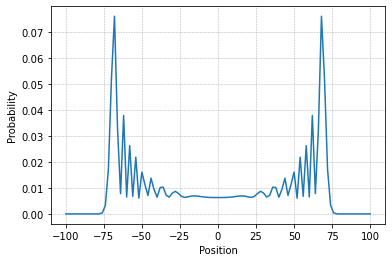

In [6]:
plt.xlabel("Position")
plt.ylabel("Probability")
plt.grid(linestyle="--", linewidth=0.5)
plt.plot(x, y)
plt.show()

Doing analysis

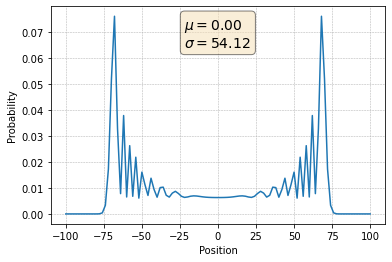

In [7]:
xdata = np.asarray(x)
ydata = np.asarray(y)
mean = sum(xdata * ydata)
sum_squared = sum((xdata**2) * ydata)
std = np.sqrt(sum_squared - mean**2)
fig, ax = plt.subplots()
plt.xlabel("Position")
plt.ylabel("Probability")
plt.grid(linestyle="--", linewidth=0.5)
textstr = "\n".join((r"$\mu=%.2f$" % (mean,), r"$\sigma=%.2f$" % (std,)))
# these are matplotlib.patch.Patch properties
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
# place a text box in upper left in axes coords
ax.text(
    0.40,
    0.95,
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="top",
    bbox=props,
)
ax.plot(x, y)
plt.show()